# ***Employee Turnover Analytics***

In [ ]:
#For Google Collab (upload the file in content folder)

# Specify the file path
file_path = '/content/1688640705_hr_comma_sep.xlsx'

In [ ]:
# 1688640705_hr_comma_sep
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")


In [ ]:
#df = pd.read_excel('1688640705_hr_comma_sep.xlsx') #for inbuilt IDEs
df = pd.read_excel(file_path)
df.rename(columns = {'average_montly_hours' : 'average_monthly_hours', 'sales' : 'Department', 'last_evaluation' : 'last_evaluation_rating'}, inplace = True)
df.tail(3)

,satisfaction_level,last_evaluation_rating,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


##### *1.	Perform data quality - info, dtypes, describe, outliers, missing values, duplicate rows/columns, distribution check .*

In [ ]:
#print("Number of Rows:" , df.shape[0], "Number of Columns:", df.shape[1])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation_rating  14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_monthly_hours   14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   Department              14999 non-null  object 
 9   salary                  14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [ ]:
print(df.dtypes)

satisfaction_level        float64
last_evaluation_rating    float64
number_project              int64
average_monthly_hours       int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Department                 object
salary                     object
dtype: object


In [ ]:
df.describe()

,satisfaction_level,last_evaluation_rating,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()/df.shape[0] #Missing Value Ratio based on columns

satisfaction_level        0.0
last_evaluation_rating    0.0
number_project            0.0
average_monthly_hours     0.0
time_spend_company        0.0
Work_accident             0.0
left                      0.0
promotion_last_5years     0.0
Department                0.0
salary                    0.0
dtype: float64

In [ ]:
print("Number of Duplicate Rows:", df.duplicated().sum() )
print("Number of non Duplicate Rows:", df.shape[0] - df.duplicated().sum())

Number of Duplicate Rows: 3008
Number of non Duplicate Rows: 11991


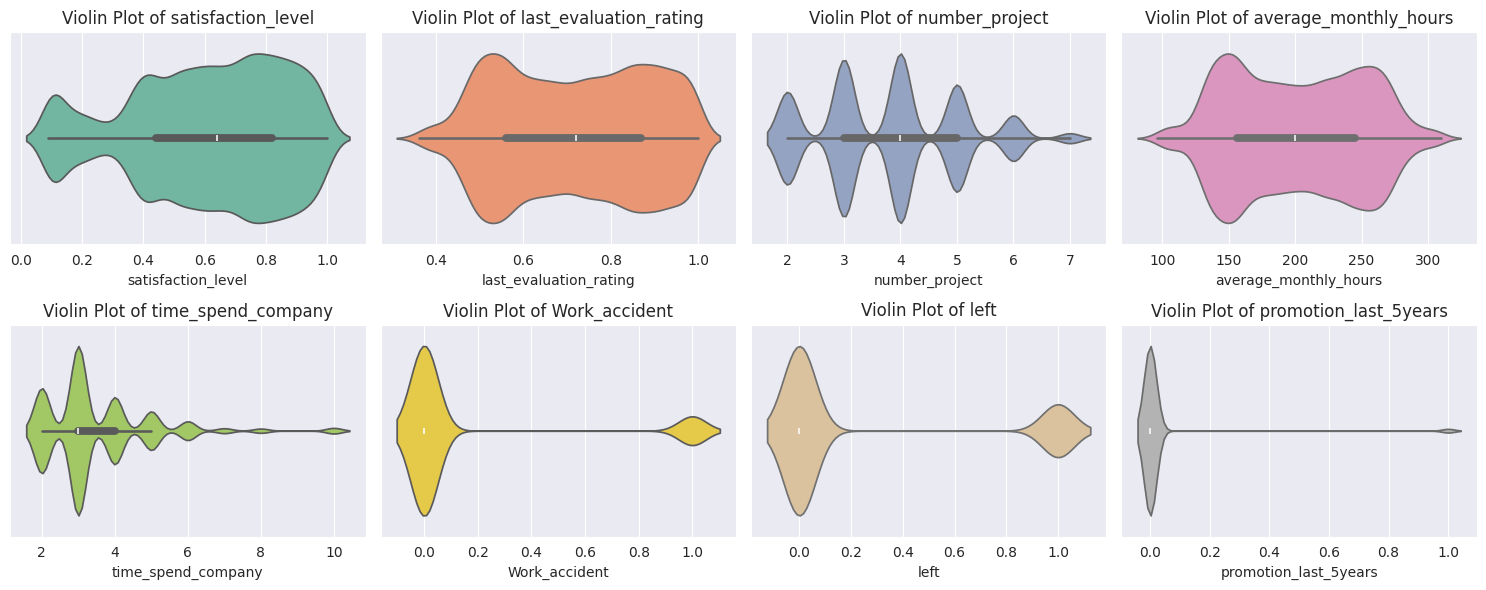

In [ ]:
# Creating a Violin plot to check for Outliers
numerical_columns = df.select_dtypes(exclude='object').columns

# Set the number of columns for the grid
num_columns = 4

# Calculate the number of rows required based on the number of columns
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

# Create a grid layout for violin plots
plt.figure(figsize=(15, 3 * num_rows))

# Define colors for the violin plots
colors = sns.color_palette("Set2", len(numerical_columns))

# Plot violin plots for each numerical column in the grid
for i, column_name in enumerate(numerical_columns):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.violinplot(x=df[column_name], color=colors[i])
    plt.title(f'Violin Plot of {column_name}')
    plt.xlabel(column_name)

# Adjust layout
plt.tight_layout()
plt.show()

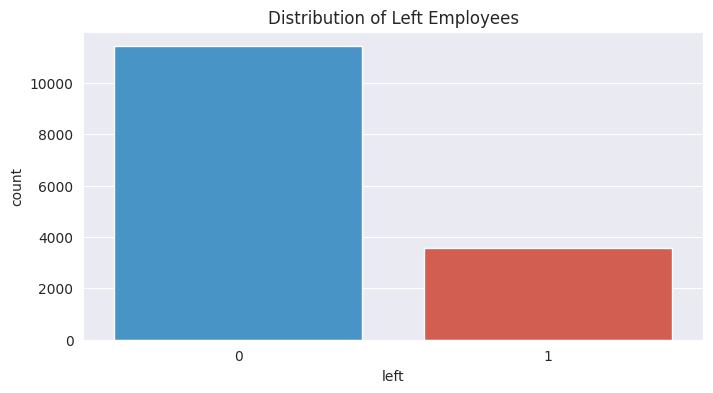

In [ ]:
plt.figure(figsize = (8,4))
custom_colors = ["#3498db", "#e74c3c"]
sns.countplot(x = df['left'], palette=custom_colors)
plt.title('Distribution of Left Employees')

plt.show()

In [ ]:
stayed = round((df['left'].value_counts()[0]/len(df['left']))*100,1)
left = round(((df['left'].value_counts()[1]/len(df['left']))*100),1)
print(f"Percentage that stayed: {stayed}% versus Percentage that left: {left}%")

Percentage that stayed: 76.2% versus Percentage that left: 23.8%


###### This is an imbalanaced dataset

#### *2.	Understand what factors contributed most to employee turnover by EDA.*

<Axes: >

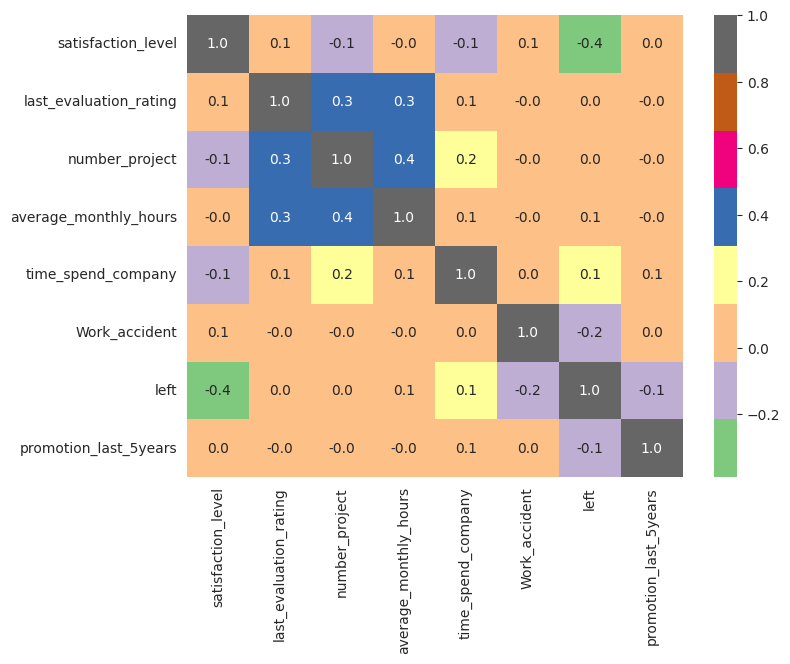

In [ ]:
correlations = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, fmt = ".1f", cmap='Accent')

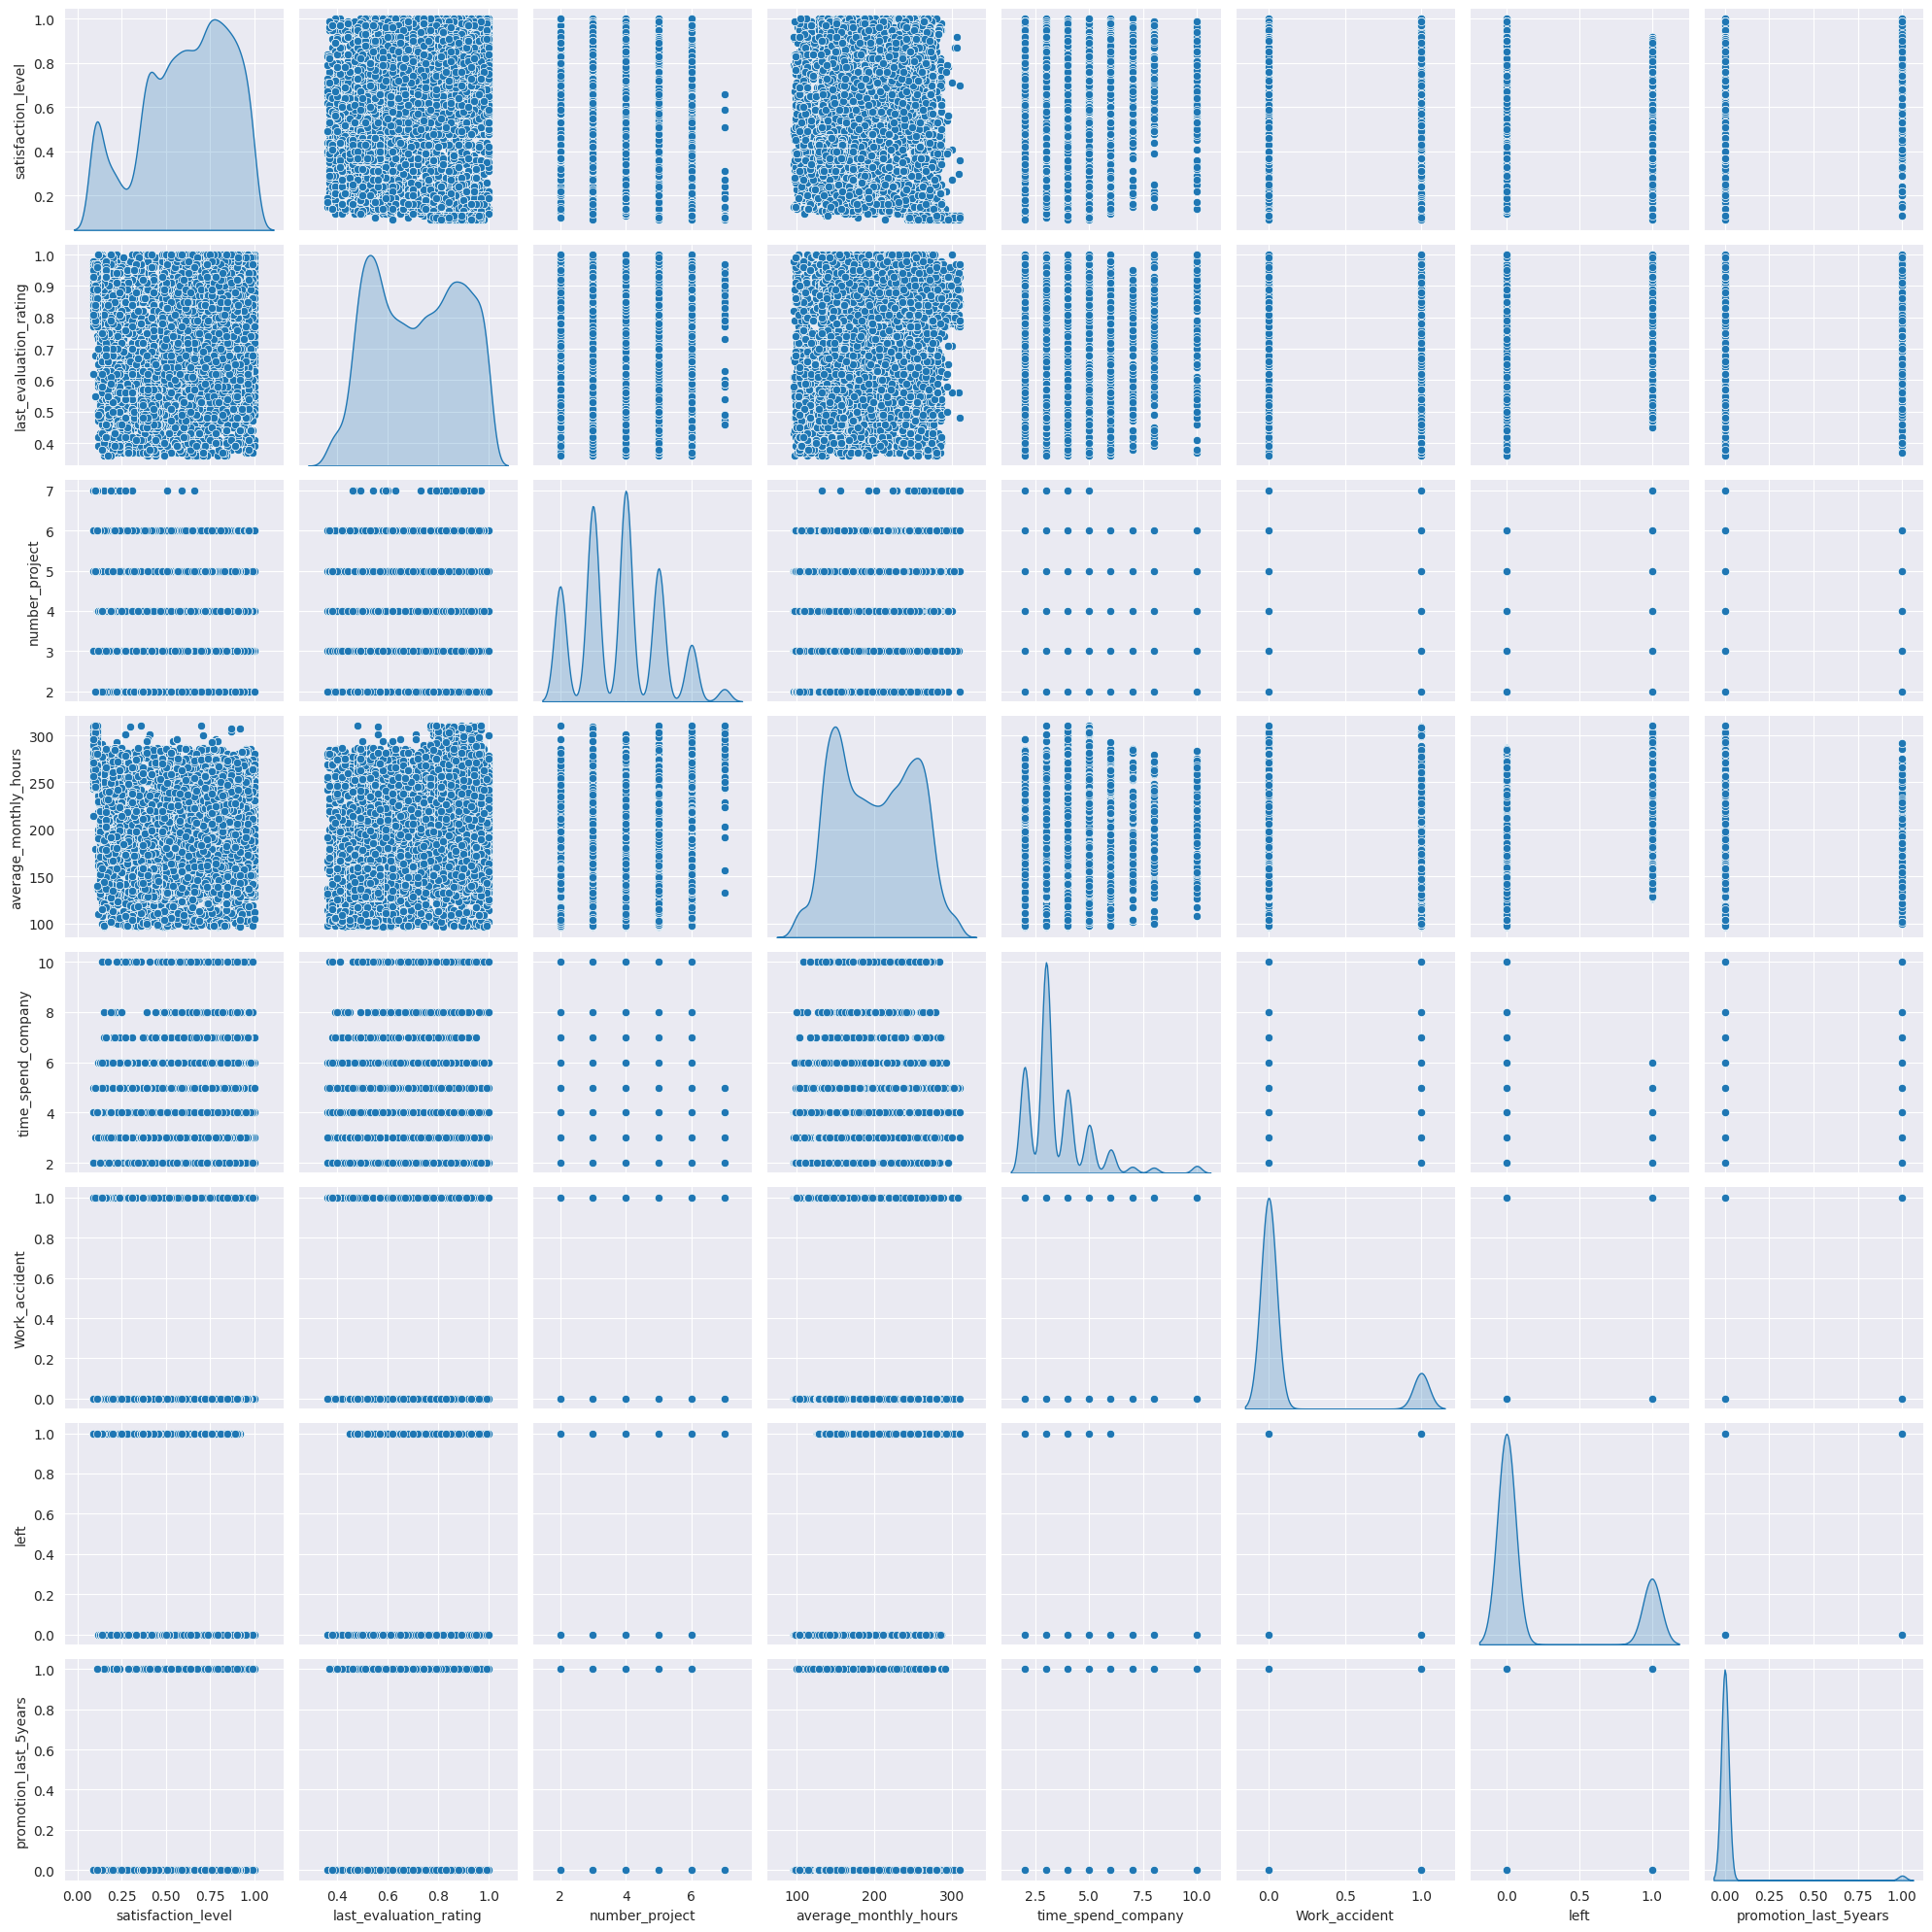

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.tight_layout()
plt.show()

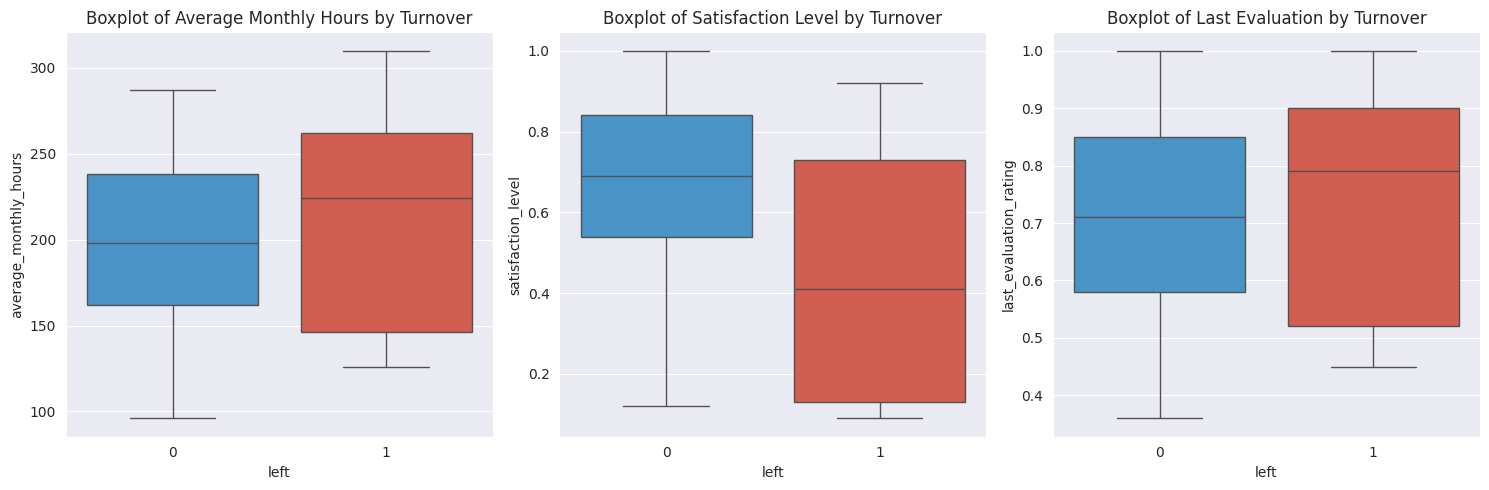

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot boxplots for each variable
sns.boxplot(x='left', y='average_monthly_hours', data=df, ax=axes[0], palette=custom_colors)
axes[0].set_title('Boxplot of Average Monthly Hours by Turnover')

sns.boxplot(x='left', y='satisfaction_level', data=df, ax=axes[1],  palette=custom_colors)
axes[1].set_title('Boxplot of Satisfaction Level by Turnover')

sns.boxplot(x='left', y='last_evaluation_rating', data=df, ax=axes[2],  palette=custom_colors)
axes[2].set_title('Boxplot of Last Evaluation by Turnover')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='salary', ylabel='count'>

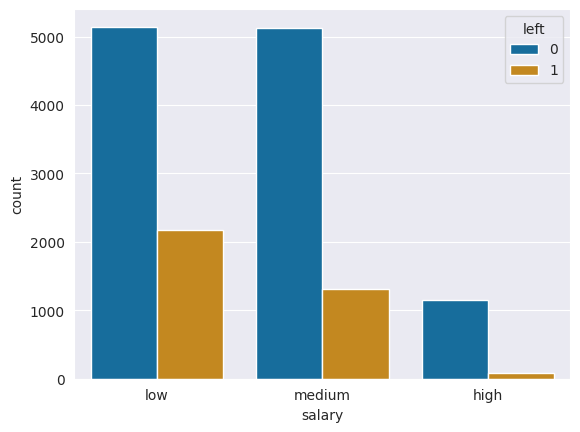

In [ ]:
# Employees that left based on salary
sns.countplot(x = 'salary', hue='left', data=df, palette='colorblind')

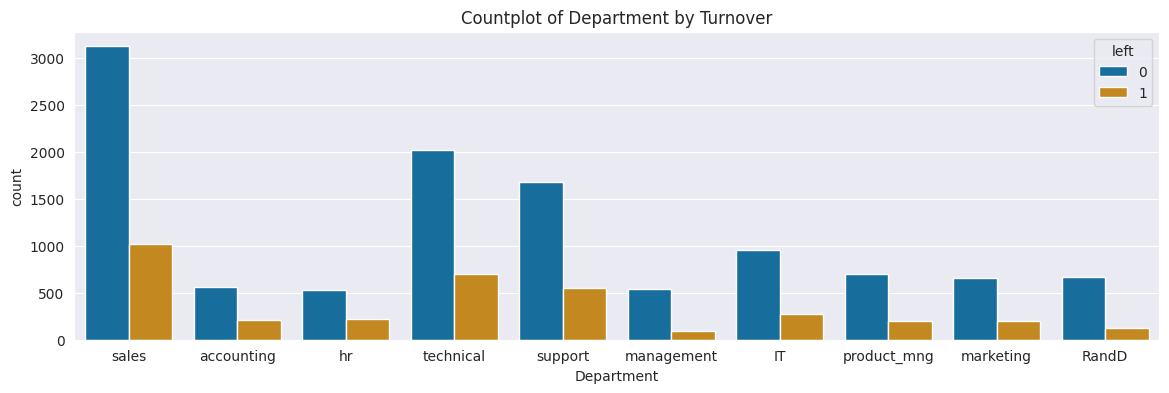

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(x='Department', hue='left', data=df, palette='colorblind')
plt.title('Countplot of Department by Turnover')
plt.show()

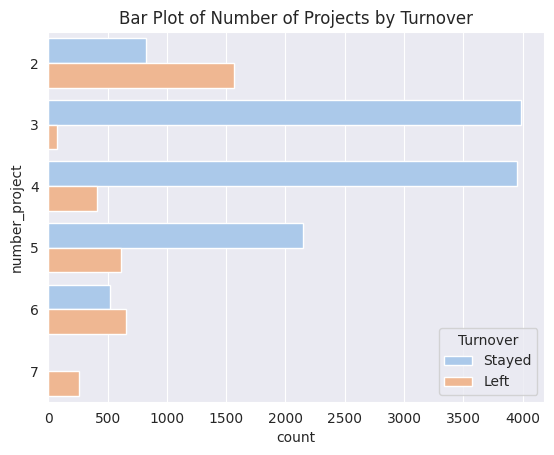

In [ ]:
# 2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization and give your inferences from the plot.
sns.countplot(y = df['number_project'], hue= df['left'], palette='pastel')

plt.title('Bar Plot of Number of Projects by Turnover')
plt.legend(loc = 'lower right', title='Turnover', labels=['Stayed', 'Left'])
plt.show()

##### Employees working on 2 projects or more than 4 projects have a higher chance of leaving the organization. While employees that work on 3 projects are most likely to stay in the organization, employees that are working on 7 projects are surely bound to leave

#### *3.	Perform clustering of Employees who left based on their satisfaction and evaluation.*

In [ ]:
# 'satisfaction_level', 'last_evaluation_rating', 'left'
scaler = StandardScaler()
columns_to_cluster = ['satisfaction_level', 'last_evaluation_rating', 'left']
df_cluster = df[columns_to_cluster]
display(df_cluster)
df_cluster_scaled = scaler.fit_transform(df_cluster)


,satisfaction_level,last_evaluation_rating,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [ ]:
#perform KMeans clustering with 3 clusters and fit_predict on the scaled date; encode a new column in df_clusters with name cluster
model1 = KMeans(n_clusters= 3 , random_state=42)
df_cluster['cluster_KMeans'] = model1.fit_predict(df_cluster_scaled)


from sklearn.cluster import AgglomerativeClustering
# Create AgglomerativeClustering model with 3 clusters
# Heirarchical CLustering type
model = AgglomerativeClustering(n_clusters=3)
df_cluster['cluster_agglo'] = model.fit_predict(df_cluster_scaled)


# Assumes that the data is generated from a mixture of several Gaussian distributions.
from sklearn.mixture import GaussianMixture
gmm_model = GaussianMixture(n_components=3, random_state=42)
df_cluster['Gaussian_Mixture_cluster'] = gmm_model.fit_predict(df_cluster_scaled)

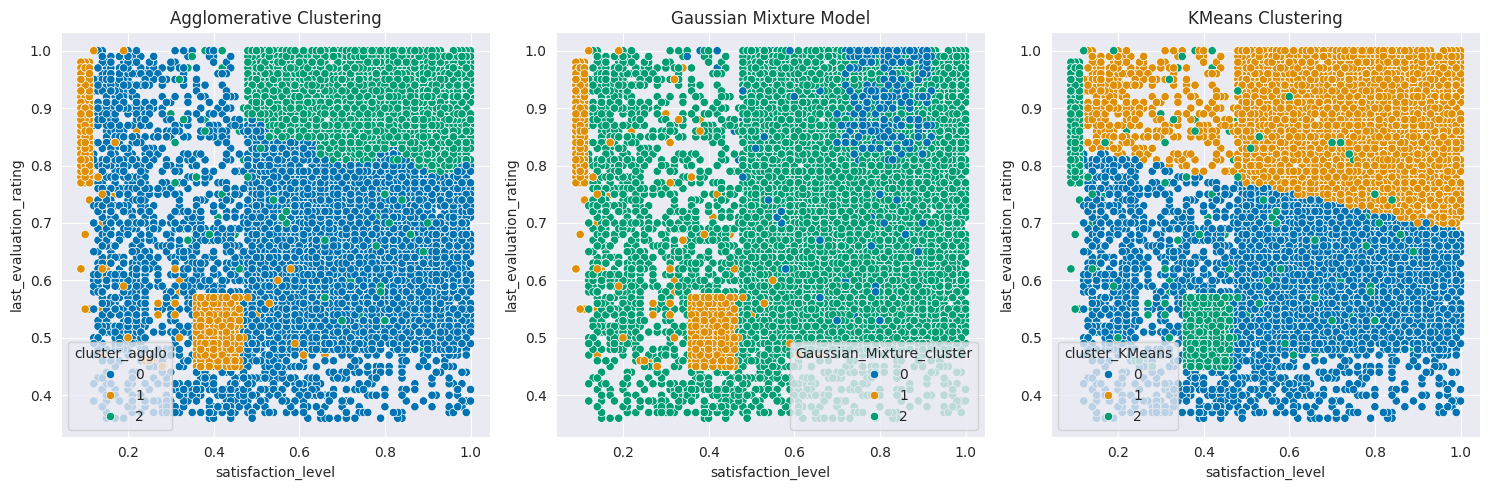

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot Agglomerative Clustering results
sns.scatterplot(x='satisfaction_level', y='last_evaluation_rating', hue='cluster_agglo', data=df_cluster, palette='colorblind', ax=axes[0])
axes[0].set_title('Agglomerative Clustering')

# Plot Gaussian Mixture Model results
sns.scatterplot(x='satisfaction_level', y='last_evaluation_rating', hue='Gaussian_Mixture_cluster', data=df_cluster, palette='colorblind', ax=axes[1])
axes[1].set_title('Gaussian Mixture Model')

# Plot KMeans Clustering results
sns.scatterplot(x='satisfaction_level', y='last_evaluation_rating', hue='cluster_KMeans', data=df_cluster, palette='colorblind', ax=axes[2])
axes[2].set_title('KMeans Clustering')

# Adjust layout
plt.tight_layout()
plt.show()

#### ***4.	Handle the left Class Imbalance using SMOTE technique***

In [ ]:
# Get unique values and value_counts()
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + " : " + str(df[column].unique()))
        print(df[column].value_counts())
        print("_____________")

Department : ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64
_____________
salary : ['low' 'medium' 'high']
low       7316
medium    6446
high      1237
Name: salary, dtype: int64
_____________


In [ ]:
# Applying Dummy encoding and dropping the first unique value of each categorical column

df_encoded = pd.get_dummies(df, drop_first = True)
display(df_encoded.tail(3))

,satisfaction_level,last_evaluation_rating,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14998,0.37,0.52,2,158,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0


#### 4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123

* **Note:** We use Stratify K-fold when the dataset is imbalanced. For a ba;anced dataset, a K-Fold cross validation should be sufficient


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df_encoded.drop("left", axis=1)
y = df_encoded["left"]
display(X)
display(y)

,satisfaction_level,last_evaluation_rating,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0


0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
# In a stratified split, the goal is to maintain the same class distribution in both the training and testing sets as in the original dataset.
# This is particularly useful when dealing with imbalanced datasets to ensure that each class is adequately represented in both the training and testing phases.

# Let's perform a normal train_test_split first to see what problem arises here.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)
print(f"Employee left ratio in test set:{y_train.value_counts()[1] / y_train.shape[0]}")
print(f"Employee left ratio in test set:{y_test.value_counts()[1] / y_test.shape[0]}")

Employee left ratio in test set:0.23851987665638802
Employee left ratio in test set:0.23633333333333334


we can see that the ratio of split in the train and the test set are different. This will create a bias when training and testing the model on random split

In [ ]:
# Let's perform a stratify split using train_test_split method

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123, stratify = y)
print(f"Employee left ratio in test set:{y_train.value_counts()[1] / y_train.shape[0]}")
print(f"Employee left ratio in test set:{y_test.value_counts()[1] / y_test.shape[0]}")

Employee left ratio in test set:0.2381031752646054
Employee left ratio in test set:0.238


if we require only 1 split and don't require multiple iterations, this type of split works the best. We can see the ratio of left = 1 is the same in both the train and the test set

In [ ]:
# Let's perform a StratifiedShuffleSplit. This technique of splitting the data works better when n_splits are more than 1

sss = StratifiedShuffleSplit(n_splits = 5, random_state = 123, test_size = 0.2 )
for train_index, test_index in sss.split(X,y):
  print("Train:", len(train_index), "Test:", len(test_index))
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print(f"Employee left ratio in test set:{y_train.value_counts()[1] / y_train.shape[0]}")
print(f"Employee left ratio in test set:{y_test.value_counts()[1] / y_test.shape[0]}")

Train: 11999 Test: 3000
Train: 11999 Test: 3000
Train: 11999 Test: 3000
Train: 11999 Test: 3000
Train: 11999 Test: 3000
Employee left ratio in test set:0.2381031752646054
Employee left ratio in test set:0.238


Suitable when we want to perform multiple shuffling and splitting iterations (controlled by n_splits).

In [ ]:
# It is time to oversample the training set to handle the target imbalance
from imblearn.over_sampling import SMOTE

# K_neighbors:  number of nearest neighbors to be used for generating synthetic samples; default is 5 here
# sampling_strategy: if set to 1, Ratio of minority: majority class will be 1:1 ; default here is auto
# Kind of SMOTE: regular SMOTE (kind='regular') is a widely used and and default variant
# If df has regions where the decision boundary b/w classes is not clear, consider  Borderline-SMOTE variants (kind='borderline1' or kind='borderline2')
sampler = SMOTE(random_state= 42, k_neighbors=10, sampling_strategy=1 )
X_train_sampled, y_train_sampled = sampler.fit_resample(X_train, y_train)
display(y_train_sampled.value_counts())

0    9142
1    9142
Name: left, dtype: int64

we can see that the minority and the majority class in the target train-set are now equal.

#### ***5.	Perform 5-Fold cross-validation model training and evaluate performance of logistic regression, random forest and gradient boosting classifiers.***

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

#### *Logistic Regression*

Accuracy on each split during cross-validation: [0.75635767 0.77768663 0.80120317 0.81514903 0.80142232]
Average Accuracy of all the splits: 0.7903637638676224
Classification Report (Cross-Validated):
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      9142
           1       0.78      0.81      0.79      9142

    accuracy                           0.79     18284
   macro avg       0.79      0.79      0.79     18284
weighted avg       0.79      0.79      0.79     18284

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      2286
           1       0.49      0.77      0.60       714

    accuracy                           0.75      3000
   macro avg       0.70      0.76      0.71      3000
weighted avg       0.81      0.75      0.77      3000



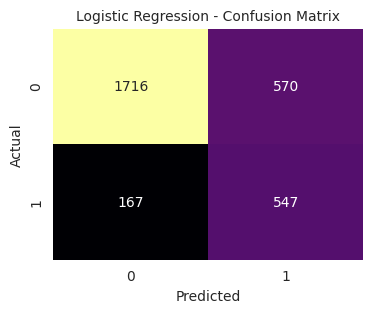

In [ ]:
#Train simple models and apply a 5-Fold Cross Validation

log_reg_model = LogisticRegression(random_state= 42)
log_reg_model.fit(X_train_sampled, y_train_sampled)

# Getting cross-validated predictions
y_train_pred_cv = cross_val_predict(log_reg_model, X_train_sampled, y_train_sampled, cv=5)
y_test_pred = log_reg_model.predict(X_test)

# Predictions split-wise
accuracies = cross_val_score(log_reg_model, X_train_sampled, y_train_sampled, cv=5, scoring='accuracy')
print("Accuracy on each split during cross-validation:", accuracies)
print("Average Accuracy of all the splits:", np.mean(accuracies))

# Classification report

print("Classification Report (Cross-Validated):\n", classification_report(y_train_sampled, y_train_pred_cv))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix of Logistic Regression
plt.figure(figsize=(4, 3))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="inferno", cbar=False)
plt.title('Logistic Regression - Confusion Matrix', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

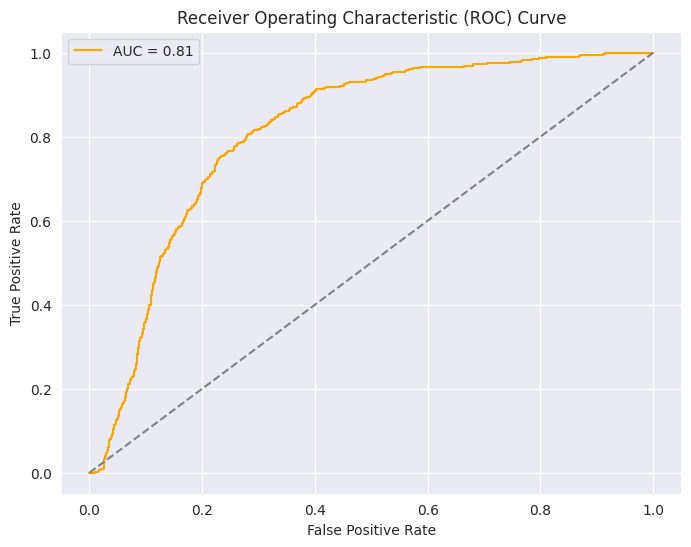

In [ ]:
# Predicting on the test set
y_test_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

# Calculate AUC score for the test set
auc_score = roc_auc_score(y_test, y_test_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### *Random Forest Classifier*

Accuracy on each split during cross-validation: [0.9773038  0.9778507  0.97812415 0.97621001 0.97565646]
Average Accuracy of all the splits: 0.9770290214085394
Classification Report (Cross-Validated):
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      9142
           1       0.99      0.96      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.98      0.98      0.98     18284
weighted avg       0.98      0.98      0.98     18284

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



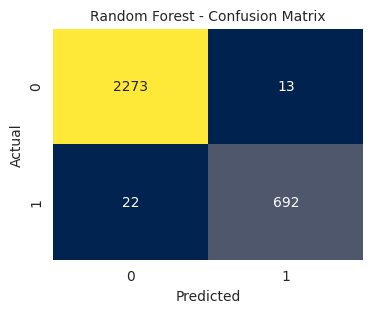

In [ ]:
random_forest_model = RandomForestClassifier(random_state = 42)
random_forest_model.fit(X_train_sampled, y_train_sampled)

# Getting cross-validated predictions
y_train_pred_cv = cross_val_predict(random_forest_model, X_train_sampled, y_train_sampled, cv=5)
y_test_pred = random_forest_model.predict(X_test)

# Predictions split-wise
accuracies = cross_val_score(random_forest_model, X_train_sampled, y_train_sampled, cv=5, scoring='accuracy')
print("Accuracy on each split during cross-validation:", accuracies)
print("Average Accuracy of all the splits:", np.mean(accuracies))

# Classification report
print("Classification Report (Cross-Validated):\n", classification_report(y_train_sampled, y_train_pred_cv))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix of Random Forest
plt.figure(figsize=(4, 3))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="cividis", cbar=False)
plt.title('Random Forest - Confusion Matrix', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

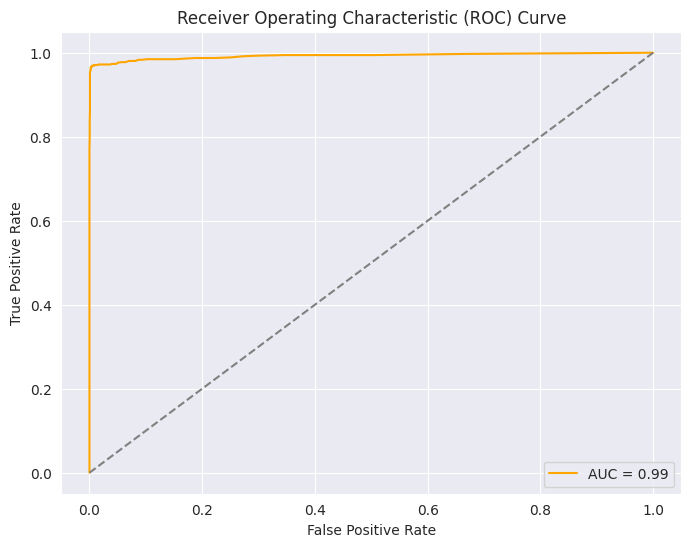

In [ ]:
# Predicting on the test set
y_test_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

# Calculate AUC score for the test set
auc_score = roc_auc_score(y_test, y_test_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### *Gradient Boosting Classifier*

Accuracy on each split during cross-validation: [0.96035001 0.95242002 0.95980312 0.95706864 0.95979212]
Average Accuracy of all the splits: 0.9578867810840874
Classification Report (Cross-Validated):
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      9142
           1       0.97      0.94      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2286
           1       0.89      0.93      0.91       714

    accuracy                           0.96      3000
   macro avg       0.93      0.95      0.94      3000
weighted avg       0.96      0.96      0.96      3000



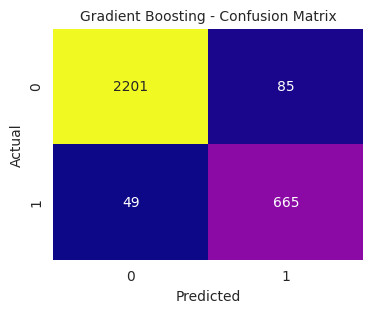

In [ ]:
grad_boost_model = GradientBoostingClassifier(random_state = 42 )
grad_boost_model.fit(X_train_sampled, y_train_sampled)

# Getting cross-validated predictions
y_train_pred_cv = cross_val_predict(grad_boost_model, X_train_sampled, y_train_sampled, cv=5)
y_test_pred = grad_boost_model.predict(X_test)

# Predictions split-wise
accuracies = cross_val_score(grad_boost_model, X_train_sampled, y_train_sampled, cv=5, scoring='accuracy')
print("Accuracy on each split during cross-validation:", accuracies)
print("Average Accuracy of all the splits:", np.mean(accuracies))

# Classification report
print("Classification Report (Cross-Validated):\n", classification_report(y_train_sampled, y_train_pred_cv))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


# Confusion Matrix of Gradient Boosting
plt.figure(figsize=(4, 3))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', cbar=False)
plt.title('Gradient Boosting - Confusion Matrix', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



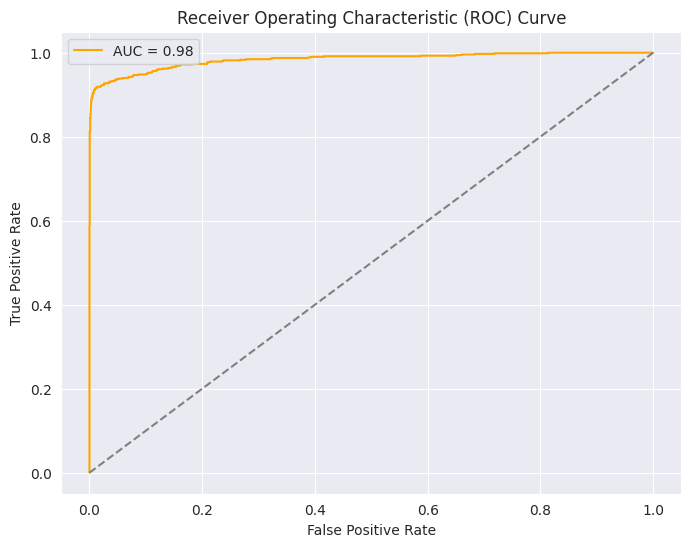

In [ ]:
# Predicting on the test set
y_test_pred_proba = grad_boost_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

# Calculate AUC score for the test set
auc_score = roc_auc_score(y_test, y_test_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Categorize employees into risk zones based on probability scores
def categorize_zone(probability_score):
    if probability_score < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 <= probability_score < 0.6:
        return 'Low Risk Zone (Yellow)'
    elif 0.6 <= probability_score < 0.9:
        return 'Medium Risk Zone (Orange)'
    else:
        return 'High Risk Zone (Red)'

# Create a new column in your test data with the categorized zones
test_data_with_zones = X_test.copy()
test_data_with_zones['Probability'] = y_test_pred_proba
test_data_with_zones['Risk Zone'] = test_data_with_zones['Probability'].apply(categorize_zone)

# Display the test data with probability scores and risk zones
print(test_data_with_zones[['Probability', 'Risk Zone']])


       Probability               Risk Zone
439       0.981708    High Risk Zone (Red)
649       0.970023    High Risk Zone (Red)
8478      0.014468       Safe Zone (Green)
13225     0.161056       Safe Zone (Green)
7962      0.023797       Safe Zone (Green)
...            ...                     ...
12884     0.148535       Safe Zone (Green)
12041     0.979030    High Risk Zone (Red)
6093      0.287797  Low Risk Zone (Yellow)
7373      0.090353       Safe Zone (Green)
686       0.983814    High Risk Zone (Red)

[3000 rows x 2 columns]


In [ ]:
print(test_data_with_zones['Risk Zone'].value_counts())

Safe Zone (Green)            2042
High Risk Zone (Red)          634
Low Risk Zone (Yellow)        244
Medium Risk Zone (Orange)      80
Name: Risk Zone, dtype: int64
